<a href="https://colab.research.google.com/github/NasiUduk27/PCVK_GANJIL_2023/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modul 7 -  Filter Spasial Low Pass Filter, High Pass Filter, Point Detection, Line Detection, Edge Detection

# Praktikum Filter

In [19]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

In [7]:
def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_img = np.zeros((output_height, output_width)).astype(np.float32)

  for y in range(0, output_height):
    for x in range(0, output_width):
      new_img[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

  return new_img

In [8]:
img = cv.imread('/content/drive/MyDrive/content/female.tiff')
img_resize = cv.resize(img, (0,0), fx=0.5, fy=0.5)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

Buat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter
berikut:


a. Sharpen

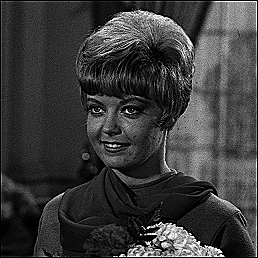

In [10]:
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
cv2_imshow(convolution2d(img_gray, sharpen, 1, 2))

b. Emboss

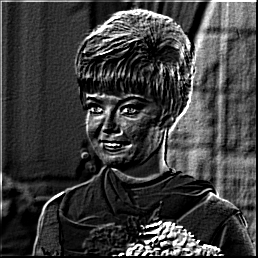

In [11]:
embos = np.array([[-2, -1, 0],
                  [-1, 1, 1],
                  [0, 1, 2]])
cv2_imshow(convolution2d(img_gray, embos, 1, 2))

c. Left Sobel Edge Detection

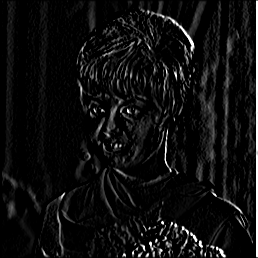

In [12]:
sobel = np.array([[1, 0, -1],
                  [2, 0, -2],
                  [1, 0, -1]])
cv2_imshow(convolution2d(img_gray, sobel, 1, 2))

d. Canny Edge Detection

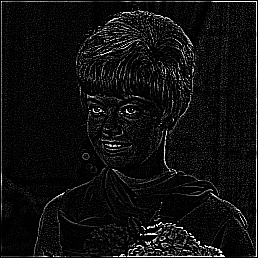

In [13]:
canny = np.array([[-1, -1, -1],
                  [-1, 8, -1],
                  [-1, -1, -1]])
cv2_imshow(convolution2d(img_gray, canny, 1, 2))

e. Prewitt Edge Detection

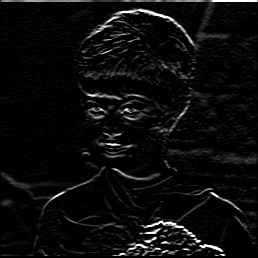

In [14]:
prewitt = np.array([[-1, -1, -1],
                  [0, 0, 0],
                  [1, 1, 1]])
cv2_imshow(convolution2d(img_gray, prewitt, 1, 2))

f. 5 x 5 Gaussian Blur

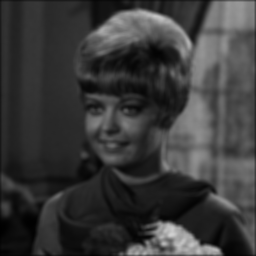

In [17]:
kernel_size = 5
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel, 1, 2))

g. 21 x 21 Gaussian Blur

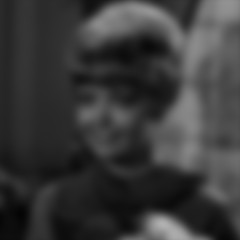

In [18]:
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel, 1, 2))

# Tugas Praktikum

### Load Dataset KTP

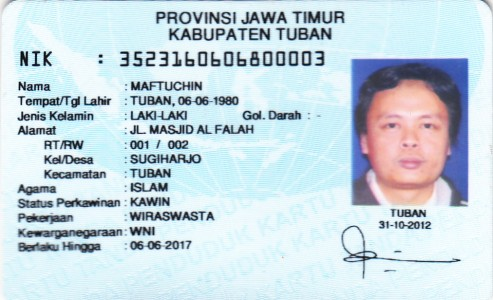

In [41]:
import cv2
import numpy as np

ktp_ori = cv2.imread('/content/drive/MyDrive/content/ktp4.png', cv2.IMREAD_COLOR)
cv2_imshow(ktp_ori)

###

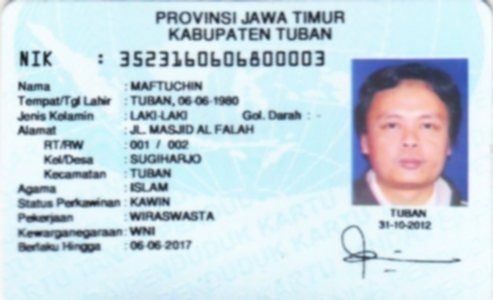

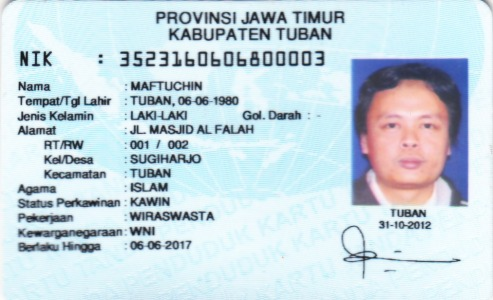

In [40]:
filter_img = cv2.GaussianBlur(ktp_ori, (5, 5), 0)

edges = cv2.Sobel(ktp_ori, cv2.CV_64F, 1, 1, ksize=5)

gray_img = cv2.cvtColor(ktp_ori, cv2.COLOR_BGR2GRAY)
equalized_img = cv2.equalizeHist(gray_img)

mix_img = cv2.addWeighted(ktp_ori, 0.7, filter_img, 0.3, 0)

cv2_imshow(filter_img)
cv2_imshow(mix_img)